First import all the libraries required 

Follow good coding conventions, such as :
1. Comment in front of code blocks to say what the code does 
2. Use simple, consistent names to avoid confusion (aka, don't just name "variable__1" etc)
3. Keep code clean and neat
4. Try to write the fewest lines of code possible to accomplish a goal. More lines does not mean you're a better coder. Ouch, hard truth...

For full details, visit: https://peps.python.org/pep-0008/


In [1]:
# Data Manipulation
import numpy as np 
import pandas as pd 

# Data Visualization
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Time
import time
import datetime

# Machine Learning
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV

# some advanced model libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# imbalanced learning: for later use 
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import chi2_contingency,  f_oneway

# don't worry about this for now 
import gc
import warnings
from tqdm import tqdm


# Set Options for displaying data visualizations
pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)
%matplotlib inline
warnings.filterwarnings("ignore")

Upload data into the file system: ./desktop/train.csv

Data Overview

In [2]:
# Load Data
path = "/content/train.csv"
# read csv file
df = pd.read_csv(path) 
# read the head of the dataframe 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The following does a brief data overview before we get into more detailed EDA (exploratory data analysis) and hypothesis testing.

It's very important to:
1. get a basic understanding of what the data is about 
2. Explore different features / variables (columns)

The goal of this section is to:

1. Get the dimensions of data
2. Get the summary of data
3. Get various statistics of data

In [3]:
# Dimensions of this dataset
print(df.shape)

(891, 12)


In [5]:
# whenever you see something that doesn't quite work out 
!pip install pandas_summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 KB 4.7 MB/s eta 0:00:00


In [6]:
from pandas_summary import DataFrameSummary


df_summary = DataFrameSummary(df)
df_summary.summary()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,NaN,NaN,714.0,891.0,891.0,NaN,891.0,NaN,NaN
mean,446.0,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.0,0.0,1.0,NaN,NaN,0.42,0.0,0.0,NaN,0.0,NaN,NaN
25%,223.5,0.0,2.0,NaN,NaN,20.125,0.0,0.0,NaN,7.9104,NaN,NaN
50%,446.0,0.0,3.0,NaN,NaN,28.0,0.0,0.0,NaN,14.4542,NaN,NaN
75%,668.5,1.0,3.0,NaN,NaN,38.0,1.0,0.0,NaN,31.0,NaN,NaN
max,891.0,1.0,3.0,NaN,NaN,80.0,8.0,6.0,NaN,512.3292,NaN,NaN
counts,891,891,891,891,891,714,891,891,891,891,204,889
uniques,891,2,3,891,2,88,7,7,681,248,147,3


Notice how there are some NA values? 
Why do you think that is? 


Later we will come to see that with features like Sex, Ticket, and Cabin, we need to do some encoding techniques. 



In [7]:
df.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [18]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

IMPORTANT NOTE (this piece of info will be important later): 

We have an imbalanced dataset, meaning the distribution of 0 and 1 for the classes will not be the same. This imbalance is not great but for credit card fraud, the percentage split could be a lot worse: 90% vs 10%, but in real life this can be even more extreme: 99% vs 1% even. But if we have 10M financial transactions with a 1%, that's 100,000 fraud cases.

In [16]:
df[""].isnull().sum()

0

One thing to note is that in data science or in computer science, there is NO need to memorize anything. If you start using the same things a lot, yes you will remember them but for other stuff, do googling and get comfortable with figuring out answers by reading official documentation.

Memorization is a low-level cognitive functioning that will not help you grow professionally. being able to find a way out of (or around) the problem / difficulty at hand is MUCH MORE valuable than knowing the exact syntax of the code

In [12]:
def understand_df(df):
    # Dimensions of dataset
    print("Dimension of the dataset is", df.shape , "\n\n")
    
    # Head of dataset
    print("First 5 rows of the dataset are \n", df.head(), "\n\n")
    
    # Summary of dataset
    print("Summary of the dataset is \n", df.describe(), "\n\n")

    # Columns of dataset
    print("The information of the dataset is as follows\n", df.info(), "\n\n")
    
    # Stats of dataset
    stats = []
    
    for col in df.columns:
        stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], 
                      df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))

    stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
    print(f"Statistics of the dataset are \n {stats_df.sort_values('Percentage of missing values', ascending=False)}\n\n")

In [13]:
understand_df(df)

Dimension of the dataset is (891, 12) 


First 5 rows of the dataset are 
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.10

EDA (exploratory data analysis)

This is important to have an idea of what the data looks like by doing some visualizations:

1. boxplots
2. distributions
3. barplots
4. scatterplots 

are good places to start exploring the data a bit. 

Boxplot of survival and age and partition (hue) by sex

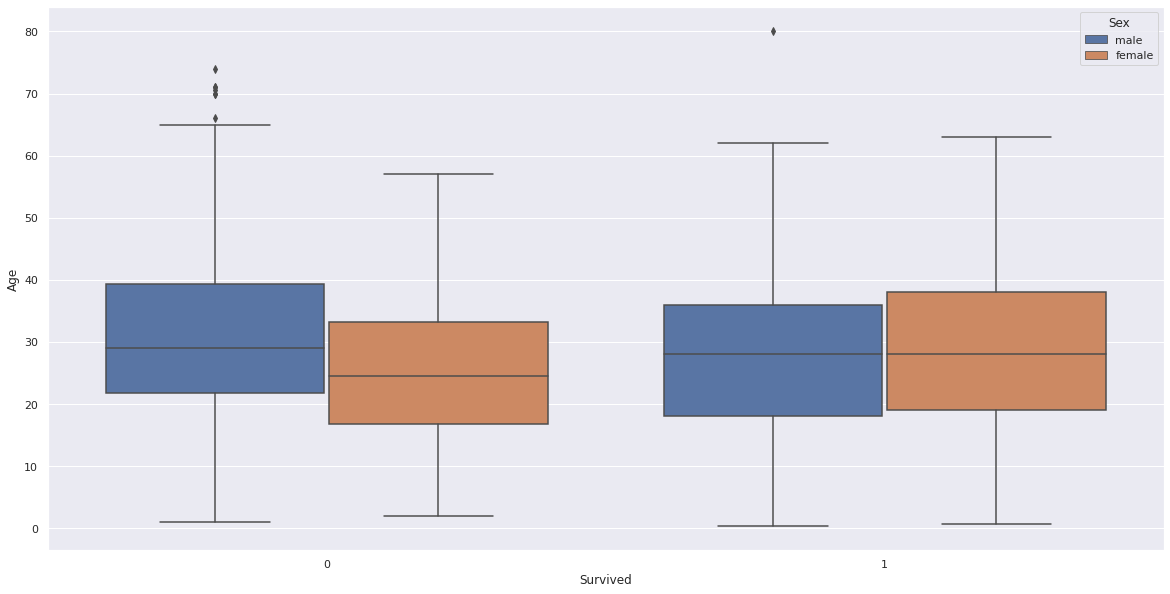

In [35]:
sns.set(rc={"figure.figsize":(20, 10)})


sns.boxplot(
    data=df,
    x='Survived',
    y='Age',
    hue="Sex")

Distribution of Age

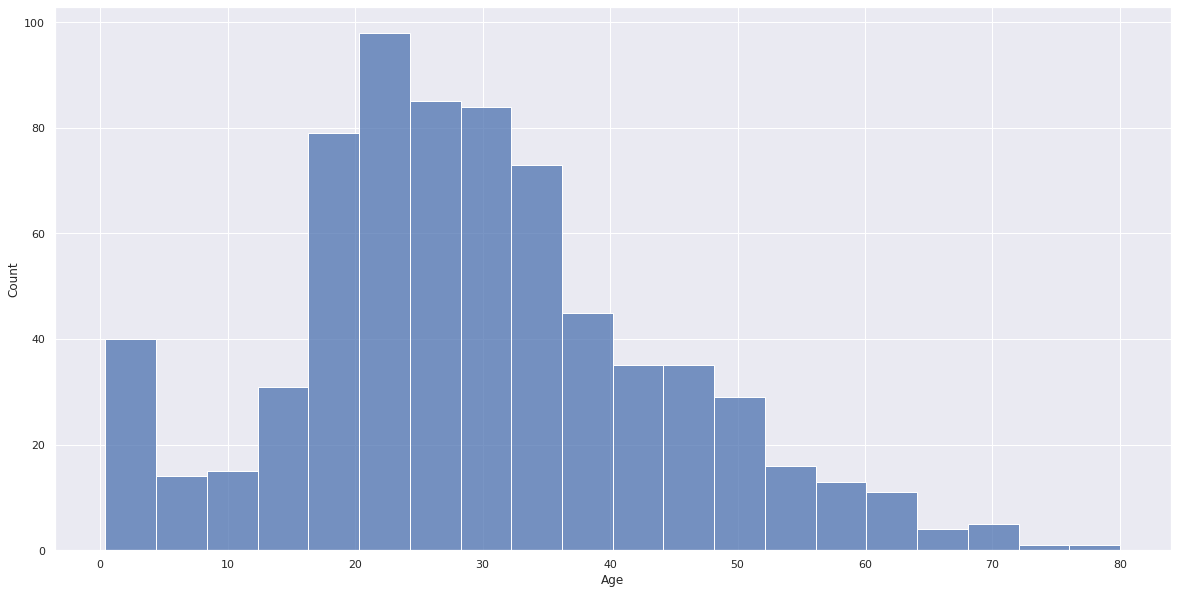

In [36]:
sns.histplot(data=df, x="Age")

Scatterplot

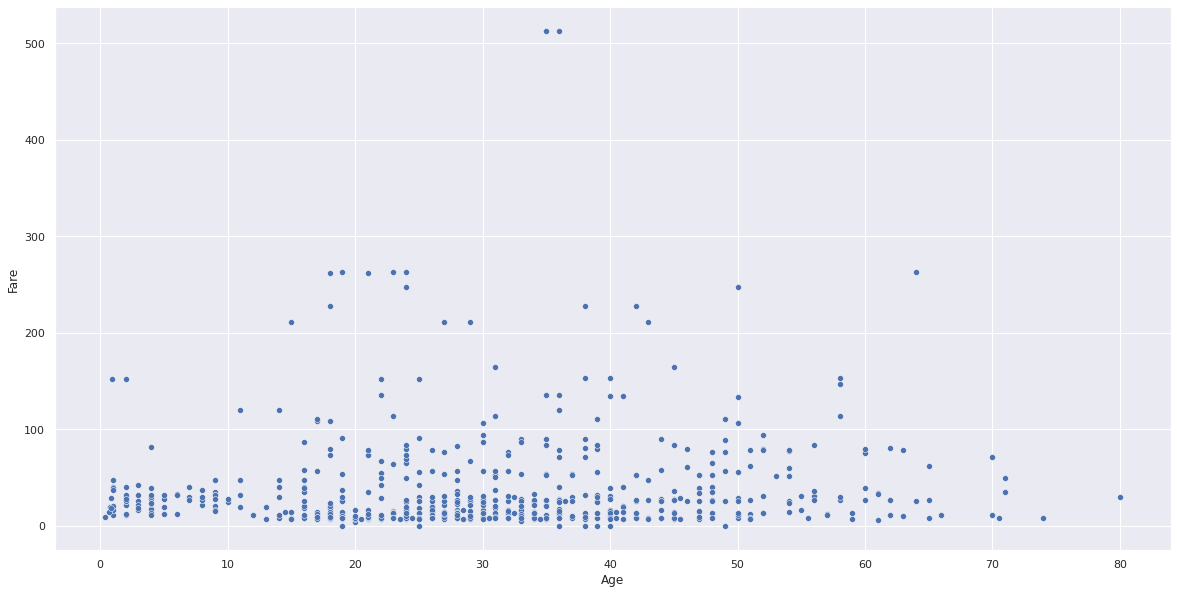

In [41]:
sns.set(rc={"figure.figsize":(20, 10)})
sns.scatterplot(data=df, x="Age", y="Fare")